In [43]:
import h2o
from h2o.automl import H2OAutoML
import pandas as pd
import seaborn as sns

In [41]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,2 hours 29 mins
H2O_cluster_timezone:,Europe/Madrid
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.4
H2O_cluster_version_age:,19 days
H2O_cluster_name:,H2O_from_python_ccastrob_7q9g6e
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.613 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


In [3]:
saved_model = h2o.load_model("../models/StackedEnsemble_AllModels_AutoML_20210726_135529")

In [6]:
df_prediction = pd.read_csv("../data/dfs_retrain/df_final_pred.csv")

In [7]:
h2o_df = h2o.H2OFrame(df_prediction)
predictions = saved_model.predict(h2o_df)

Parse progress: |█████████████████████████████████████████████████████████| 100%
stackedensemble prediction progress: |████████████████████████████████████| 100%


In [8]:
h2o_df["prediction"] = predictions

In [9]:
final_df = h2o_df.as_data_frame()
final_df = final_df.astype({"prediction": int})

In [11]:
final_df["error"] = final_df["buy_price"] - final_df["prediction"]
final_df["abs_error"] = abs(final_df["buy_price"] - final_df["prediction"])
final_df["per_error"] = (final_df["error"] / final_df["buy_price"]) * 100
final_df["per_abs_error"] = (final_df["abs_error"] / final_df["buy_price"]) * 100
final_df["good_purchase"] = final_df["error"] < 0

In [12]:
cols = ["buy_price", "prediction", "error", "per_error", "good_purchase", "abs_error", "per_abs_error"]

In [13]:
(final_df["per_abs_error"] < 10).value_counts()

False    115
True      85
Name: per_abs_error, dtype: int64

In [19]:
(final_df["per_abs_error"] > 50).value_counts()

False    194
True       6
Name: per_abs_error, dtype: int64

In [18]:
final_df[cols].sample(20)

,buy_price,prediction,error,per_error,good_purchase,abs_error,per_abs_error
11,148000,1.437429e+05,4257.051124,2.876386,False,4257.051124,2.876386
32,229000,2.808544e+05,-51854.446871,-22.643863,True,51854.446871,22.643863
124,2340000,2.001413e+06,338586.524611,14.469510,False,338586.524611,14.469510
121,785000,1.056320e+06,-271320.079613,-34.563067,True,271320.079613,34.563067
15,118000,1.381284e+05,-20128.400224,-17.057966,True,20128.400224,17.057966
42,395000,3.497190e+05,45281.024779,11.463551,False,45281.024779,11.463551
194,190000,1.989547e+05,-8954.730622,-4.713016,True,8954.730622,4.713016
154,3700000,4.252218e+06,-552217.743137,-14.924804,True,552217.743137,14.924804
166,820000,9.779417e+05,-157941.729655,-19.261187,True,157941.729655,19.261187
87,800000,8.305989e+05,-30598.879860,-3.824860,True,30598.879860,3.824860


<AxesSubplot:xlabel='buy_price', ylabel='per_error'>

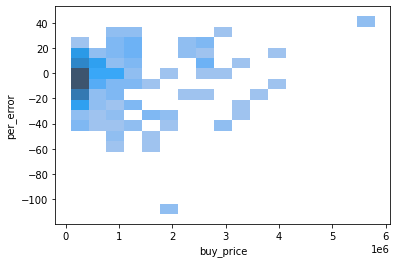

In [17]:
sns.histplot(x=final_df["buy_price"], y=final_df["per_error"])

In [21]:
test_df = final_df[final_df["per_abs_error"] > 50]

In [23]:
test_df

,sq_mt_built,n_rooms,n_bathrooms,latitude,longitude,buy_price,is_new_development,is_renewal_needed,has_lift,is_exterior,...,house_type,value_m2,neighborhood,district,prediction,error,abs_error,per_error,per_abs_error,good_purchase
81,246,3,3,40.466451,-3.675714,795000,0,1.0,0,1,...,0,5363.75,Nueva España,Chamartín,1.249637e+06,-4.546368e+05,4.546368e+05,-57.187013,57.187013,True
93,188,4,4,40.461339,-3.668434,850000,0,1.0,1,1,...,0,5363.75,Nueva España,Chamartín,1.307697e+06,-4.576969e+05,4.576969e+05,-53.846698,53.846698,True
142,754,7,6,40.460380,-3.636918,1900000,0,0.0,0,0,...,3,4275.46,Conde Orgaz-Piovera,Hortaleza,4.024108e+06,-2.124108e+06,2.124108e+06,-111.795140,111.795140,True
143,520,5,5,40.461324,-3.632291,1650000,0,0.0,0,0,...,3,4275.46,Conde Orgaz-Piovera,Hortaleza,2.544664e+06,-8.946641e+05,8.946641e+05,-54.222065,54.222065,True
147,384,5,6,40.455587,-3.627387,1450000,0,0.0,0,0,...,3,4275.46,Conde Orgaz-Piovera,Hortaleza,2.184255e+06,-7.342554e+05,7.342554e+05,-50.638306,50.638306,True
151,754,7,6,40.462280,-3.640417,1950000,0,0.0,0,0,...,3,4275.46,Conde Orgaz-Piovera,Hortaleza,4.108243e+06,-2.158243e+06,2.158243e+06,-110.679109,110.679109,True


In [31]:
final_df[final_df["per_abs_error"] > 90]

,sq_mt_built,n_rooms,n_bathrooms,latitude,longitude,buy_price,is_new_development,is_renewal_needed,has_lift,is_exterior,...,house_type,value_m2,neighborhood,district,prediction,error,abs_error,per_error,per_abs_error,good_purchase
142,754,7,6,40.46038,-3.636918,1900000,0,0.0,0,0,...,3,4275.46,Conde Orgaz-Piovera,Hortaleza,4.024108e+06,-2.124108e+06,2.124108e+06,-111.795140,111.795140,True
151,754,7,6,40.46228,-3.640417,1950000,0,0.0,0,0,...,3,4275.46,Conde Orgaz-Piovera,Hortaleza,4.108243e+06,-2.158243e+06,2.158243e+06,-110.679109,110.679109,True


In [32]:
final_df[final_df["buy_price"] > 5000000]

,sq_mt_built,n_rooms,n_bathrooms,latitude,longitude,buy_price,is_new_development,is_renewal_needed,has_lift,is_exterior,...,house_type,value_m2,neighborhood,district,prediction,error,abs_error,per_error,per_abs_error,good_purchase
86,590,3,4,40.463199,-3.681879,5800000,0,0.0,1,1,...,2,5363.75,Nueva España,Chamartín,3.178366e+06,2.621634e+06,2.621634e+06,45.200588,45.200588,False
125,590,3,4,40.463199,-3.681879,5800000,0,0.0,1,1,...,2,5363.75,Nueva España,Chamartín,3.178366e+06,2.621634e+06,2.621634e+06,45.200588,45.200588,False


In [33]:
final_df.drop_duplicates()

,sq_mt_built,n_rooms,n_bathrooms,latitude,longitude,buy_price,is_new_development,is_renewal_needed,has_lift,is_exterior,...,house_type,value_m2,neighborhood,district,prediction,error,abs_error,per_error,per_abs_error,good_purchase
0,115,3,1,40.385086,-3.742899,235000,0,0.0,1,1,...,0,2048.47,Vista Alegre,Carabanchel,240657.207808,-5657.207808,5657.207808,-2.407322,2.407322,True
1,97,1,1,40.393745,-3.752625,249000,0,0.0,1,1,...,0,2190.48,Aluche,Latina,234914.444999,14085.555001,14085.555001,5.656849,5.656849,False
2,78,3,1,40.390608,-3.736505,146000,0,0.0,0,1,...,0,2048.47,Vista Alegre,Carabanchel,157023.369870,-11023.369870,11023.369870,-7.550253,7.550253,True
3,69,3,1,40.388911,-3.739686,139000,0,0.0,1,1,...,0,2048.47,Vista Alegre,Carabanchel,176238.216960,-37238.216960,37238.216960,-26.790084,26.790084,True
4,106,3,1,40.378729,-3.748400,210000,0,1.0,1,1,...,0,2048.47,Vista Alegre,Carabanchel,201922.327470,8077.672530,8077.672530,3.846511,3.846511,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,95,3,1,40.362797,-3.698885,152000,0,0.0,1,1,...,0,1796.68,Los Ángeles,Villaverde,174783.234823,-22783.234823,22783.234823,-14.988970,14.988970,True
196,110,3,2,40.366300,-3.685271,239000,0,0.0,1,1,...,0,1912.80,San Fermín,Usera,253241.854820,-14241.854820,14241.854820,-5.958935,5.958935,True
197,51,1,1,40.347190,-3.704380,163000,1,NaN,1,1,...,0,1617.18,San Andrés,Villaverde,153941.991808,9058.008192,9058.008192,5.557060,5.557060,False
198,124,2,2,40.347190,-3.704380,291000,1,NaN,1,1,...,2,1617.18,San Andrés,Villaverde,324404.179814,-33404.179814,33404.179814,-11.479100,11.479100,True


<AxesSubplot:xlabel='buy_price', ylabel='Count'>

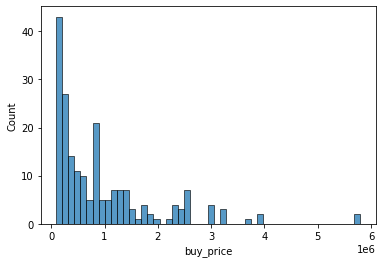

In [37]:
sns.histplot(final_df["buy_price"], bins=50)

In [39]:
(final_df["buy_price"] > 3000000).value_counts()

False    192
True       8
Name: buy_price, dtype: int64